#  Actividad | Regresion Linea Polinomial

### Integrantes

Alumno: **Erick de Jesus Hernández Cerecedo**  
Matricula: **A01066428**

### Información del Curso

Nombre: **Ciencia y analítica de datos**  
Profesor: **Jobish Vallikavungal Devassia**

Fechas: **Martes 9 de noviembre de 2022**

---

In [68]:
# Importacion de librerias
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Modelo Linel
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

# Metricas 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split train & test
from sklearn.model_selection import train_test_split

# Transformaciones
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [69]:
# Lectura de los datos
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
748,5.323202,32.036748
892,6.064987,34.244433
14,1.652687,51.440970
811,5.577656,31.949246
258,3.635282,47.945892
970,7.079726,35.273326
643,4.978922,42.644005
909,6.215400,32.380077
609,4.850305,32.186294
0,1.000000,95.066056


In [70]:
# Datos de entrada X, datos de salida Y
X = df[['Number of Units']]
y = df[['Manufacturing Cost']]

# Descripcion de los conjuntos
print(X.describe())
print(y.describe())

       Number of Units
count      1000.000000
mean          4.472799
std           1.336241
min           1.000000
25%           3.594214
50%           4.435958
75%           5.324780
max          10.000000
       Manufacturing Cost
count         1000.000000
mean            40.052999
std             10.595322
min             20.000000
25%             32.912036
50%             38.345781
75%             44.531822
max            100.000000


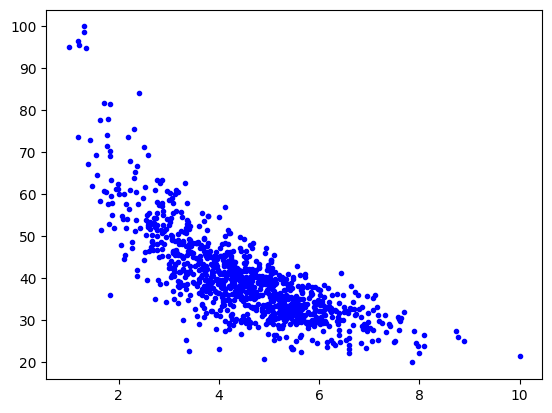

In [71]:
plt.plot(X,y,'b.')

array([[<AxesSubplot: title={'center': 'Number of Units'}>,
        <AxesSubplot: title={'center': 'Manufacturing Cost'}>]],
      dtype=object)

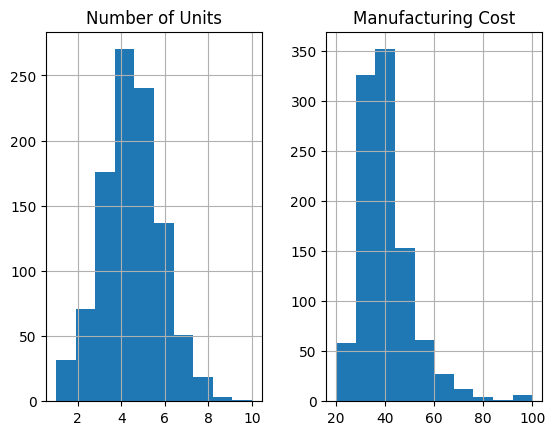

In [72]:
df.hist()

1. Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [73]:
# Division de conjuntos
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 100
number of training samples: 900


2. Regresión Lineal.
* Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [74]:
# Objeto de Regresion Lineal.
LR = LinearRegression()

# Entrenamos el modelo
LR.fit(x_train, y_train)

# Generamos las predicciones
yhat_LR = LR.predict(x_test)

m = LR.coef_[0][0]
b = LR.intercept_[0]

print("Ecuacion de la Recta:")
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficiente (m): %.2f' % m)
# Este es el valor donde corta el eje Y (en X=0)
print('Termino independiente (b): %.2f' % b)
# Imprimimos la ecuacion de la recta
print("La ecuación de la recta es: y = %.2fx + %.2f" % (m, b))

print("\nMetricas:")
# Error Cuadrado Medio
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, yhat_LR))
# Raiz del Error Cuadrado Medio
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_test, yhat_LR)))
# Median Absolut Error
print("Median Absolut Error (MAE): %.2f" % mean_absolute_error(y_test, yhat_LR))
# R2 Square
print("R2 Score: %.2f" % r2_score(y_test, yhat_LR))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Varianza score: %.2f' % r2_score(y_test, yhat_LR))



Ecuaciuon de la Recta:
Coefficiente (m): -6.10
Termino independiente (b): 67.38
La ecuación de la recta es: y = -6.10x + 67.38

Metricas:
Mean Squared Error (MSE): 53.75
Root Mean Squared Error (RMSE): 7.33
Median Absolut Error (MAE): 5.33
R2 Score: 0.47
Varianza score: 0.47


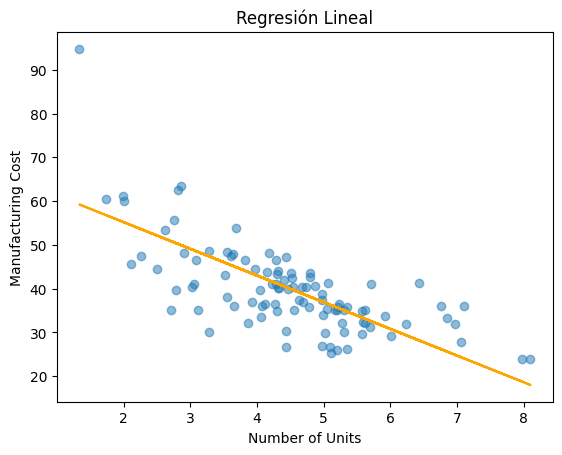

In [75]:
plt.title('Regresión Lineal')
plt.ylabel('Manufacturing Cost')
plt.xlabel('Number of Units')
plt.scatter(x_test, y_test, alpha=0.5)
plt.plot(x_test, yhat_LR, color='orange')

3. Regresión Polinomial.
* Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [76]:
# Usaremos polinomios de grado 2
pf = PolynomialFeatures(degree = 2)
# Transformamos la entrada polinomica
x_train_pr = pf.fit_transform(x_train)

# Objeto de regresion lineal
LR2 = LinearRegression()
# Entrenamos el modelo
LR2.fit(x_train_pr, y_train)

# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(LR2.coef_[0]) + ', b = ' + str(LR2.intercept_))

c_x1 = LR2.coef_[0][1]
c_x2 = LR2.coef_[0][2]
c_b = LR2.intercept_

print("Ecuacion de la Recta:")
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficientes: x = %.2f y x2 = %.2f' % (c_x1, c_x2))
# Este es el valor donde corta el eje Y (en X=0)
print('Termino independiente (b): %.2f' % c_b)
# Imprimimos la ecuacion de la recta
print("La ecuación de la recta es: y = %.2f + %.2fx + %.2fx2" % (c_b, c_x1, c_x2))





w = [  0.         -16.95951164   1.18045396], b = [90.21797852]
Ecuaciuon de la Recta:
Coefficientes: x = -16.96 y x2 = 1.18
Termino independiente (b): 90.22
La ecuación de la recta es: y = 90.22 + -16.96x + 1.18x2


In [77]:
# Transformamos la entrada polinomica de prueba
x_test_pr = pf.fit_transform(x_test)
# Generamos las predicciones
yhat_PR = LR2.predict(x_test_pr)

print("\nMetricas:")
# Error Cuadrado Medio
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, yhat_PR))
# Raiz del Error Cuadrado Medio
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_test, yhat_PR)))
# Median Absolut Error
print("Median Absolut Error (MAE): %.2f" % mean_absolute_error(y_test, yhat_PR))
# R2 Square
print("R2 Score: %.2f" % r2_score(y_test, yhat_PR))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Varianza score: %.2f' % r2_score(y_test, yhat_PR))



Metricas:
Mean Squared Error (MSE): 45.82
Root Mean Squared Error (RMSE): 6.77
Median Absolut Error (MAE): 5.16
R2 Score: 0.55
Varianza score: 0.55


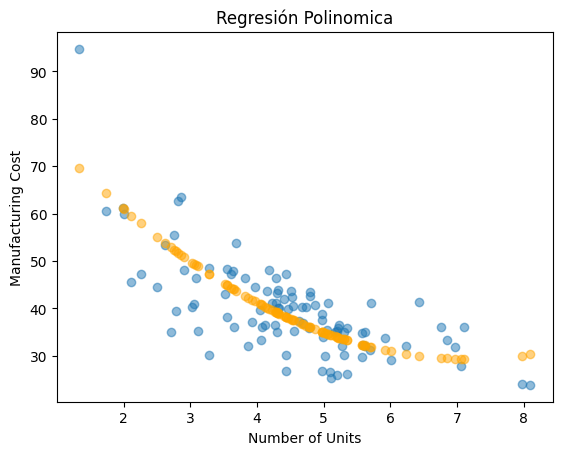

In [78]:
plt.title('Regresión Polinomica')
plt.ylabel('Manufacturing Cost')
plt.xlabel('Number of Units')
plt.scatter(x_test, y_test, alpha=0.5)
plt.scatter(x_test, yhat_PR, color='orange', alpha=0.5)

4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [79]:
# LASSO

# Definicion del pipeline para las transformaciones
LASSO = Pipeline(
    [
        ('polinomial', PolynomialFeatures(degree=2)),
        ('scaler', StandardScaler()), 
        ('lasso', Lasso())
    ]
)

# Transformaciones y entrenamiento
LASSO.fit(x_train, y_train)

# Generamos predicciones 
yhat_LASSO = LASSO.predict(x_test)

m_c = LASSO["lasso"].coef_[1]
b_c = LASSO["lasso"].intercept_[0]

print("Informacion de la Recta:")
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficiente (m): %.2f' % m_c)
# Este es el valor donde corta el eje Y (en X=0)
print('Termino independiente (b): %.2f' % b_c)


print("\nMetricas:")
# Error Cuadrado Medio
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, yhat_LASSO))
# Raiz del Error Cuadrado Medio
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_test, yhat_LASSO)))
# Median Absolut Error
print("Median Absolut Error (MAE): %.2f" % mean_absolute_error(y_test, yhat_LASSO))
# R2 Square
print("R2 Score: %.2f" % r2_score(y_test, yhat_LASSO))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Varianza score: %.2f' % r2_score(y_test, yhat_LASSO))

Informacion de la Recta:
Coefficiente (m): -7.17
Termino independiente (b): 40.10

Metricas:
Mean Squared Error (MSE): 52.93
Root Mean Squared Error (RMSE): 7.28
Median Absolut Error (MAE): 5.19
R2 Score: 0.48
Varianza score: 0.48


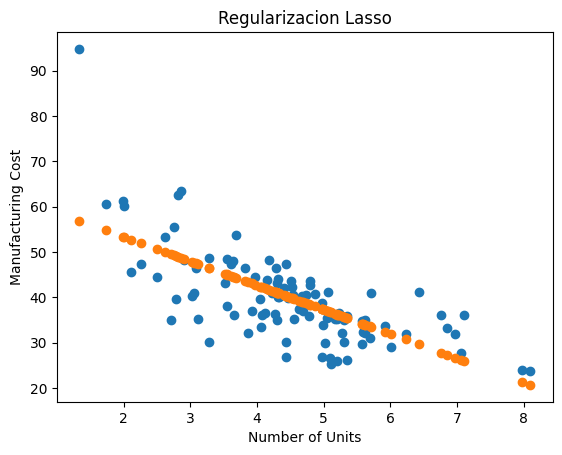

In [80]:
plt.title('Regularizacion Lasso')
plt.ylabel('Manufacturing Cost')
plt.xlabel('Number of Units')
plt.scatter(x_test, y_test)
plt.scatter(x_test, yhat_LASSO)

In [81]:
# RIDGE

# Pipeline para transformacion
RIDGE = Pipeline(
    [
        ('polinomial', PolynomialFeatures(degree=15)),
        ('scaler', StandardScaler()), 
        ('ridge', Ridge())
    ]
)

# Transformacion y entrenamiento
RIDGE.fit(x_train, y_train)

# Generamos predicciones
yhat_RIDGE = RIDGE.predict(x_test)

m_c = np.mean(RIDGE["ridge"].coef_)
b_c = RIDGE["ridge"].intercept_[0]

print("Informacion de la Recta:")
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficiente (m): %.2f' % m_c)
# Este es el valor donde corta el eje Y (en X=0)
print('Termino independiente (b): %.2f' % b_c)


print("\nMetricas:")
# Error Cuadrado Medio
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, yhat_RIDGE))
# Raiz del Error Cuadrado Medio
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_test, yhat_RIDGE)))
# Median Absolut Error
print("Median Absolut Error (MAE): %.2f" % mean_absolute_error(y_test, yhat_RIDGE))
# R2 Square
print("R2 Score: %.2f" % r2_score(y_test, yhat_RIDGE))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Varianza score: %.2f' % r2_score(y_test, yhat_RIDGE))

Informacion de la Recta:
Coefficiente (m): -0.52
Termino independiente (b): 40.10

Metricas:
Mean Squared Error (MSE): 43.75
Root Mean Squared Error (RMSE): 6.61
Median Absolut Error (MAE): 5.07
R2 Score: 0.57
Varianza score: 0.57


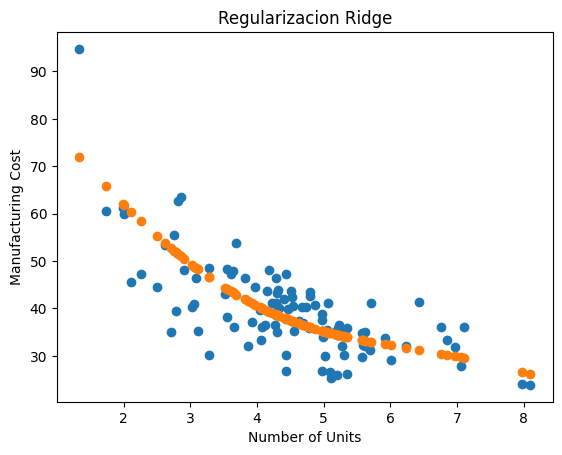

In [82]:
plt.title('Regularizacion Ridge')
plt.ylabel('Manufacturing Cost')
plt.xlabel('Number of Units')
plt.scatter(x_test, y_test)
plt.scatter(x_test, yhat_RIDGE)

5. Finalmente grafica :
* MAE (de los cuatro métodos) 
* R2 (de los cuatro métodos)

MAE Regresión Lineal: 5.325178891656717 
MAE Regresión Polinomial: 5.162954150580809 
MAE Lasso: 5.194283737822094 
MAE Ridge: 5.072079411117113


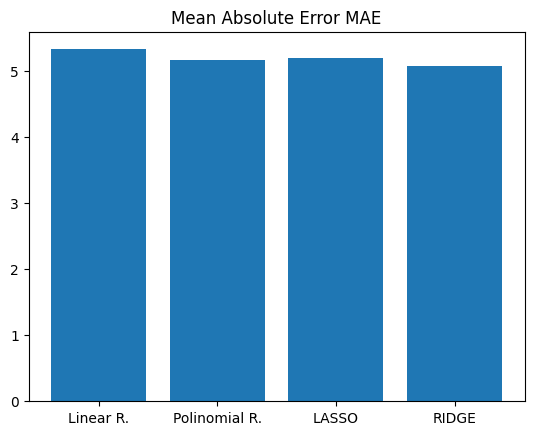

In [89]:
# Nombres de los modelos
nombres = ['Linear R.', 'Polinomial R.', 'LASSO', 'RIDGE']

# Valores de error MAE
LR_MAE = mean_absolute_error(y_test, yhat_LR)
PR_MAE = mean_absolute_error(y_test, yhat_PR)
LASSO_MAE = mean_absolute_error(y_test, yhat_LASSO)
RIDGE_MAE = mean_absolute_error(y_test, yhat_RIDGE)

plt.title("Mean Absolute Error MAE")
plt.bar(nombres, [LR_MAE, PR_MAE, LASSO_MAE, RIDGE_MAE])

# Impresion de valores
print('MAE Regresión Lineal:', LR_MAE, '\nMAE Regresión Polinomial:', PR_MAE, '\nMAE Lasso:', LASSO_MAE, '\nMAE Ridge:', RIDGE_MAE)

R2 Regresión Lineal: 0.4731766343360183 
R2 Regresión Polinomial: 0.5509478069029586 
R2 Lasso: 0.48127493684736933 
R2 Ridge: 0.571210122584145


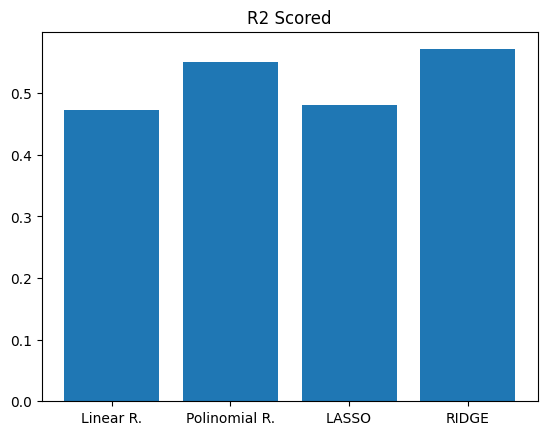

In [90]:
# Valores de error R2
LR_R2 = r2_score(y_test, yhat_LR)
PR_R2 = r2_score(y_test, yhat_PR)
LASSO_R2 = r2_score(y_test, yhat_LASSO)
RIDGE_R2 = r2_score(y_test, yhat_RIDGE)

plt.title("R2 Scored")
plt.bar(nombres, [LR_R2, PR_R2, LASSO_R2, RIDGE_R2])

print('R2 Regresión Lineal:', LR_R2, '\nR2 Regresión Polinomial:', PR_R2, '\nR2 Lasso:', LASSO_R2, '\nR2 Ridge:', RIDGE_R2)